# Hierarchial Clustering

# Import Libraries & DataSets

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline 
import numpy as np 
import seaborn as sns

In [4]:
customer_data=pd.read_csv(r"C:\Users\Anupa\Desktop\Learnby- Machine learning & AI\Statistics & Machine Learning_August 2020\PPT & CODE\KMeans Clustering\Practise Code\shopping_data.csv")

In [5]:
customer_data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
customer_data.shape

(200, 5)

In [12]:
customer_data.describe(percentiles=[0.01,0.25,0.50,0.75,0.99])

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
1%,2.990000,18.000000,15.990000,2.980000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
99%,198.010000,69.010000,126.110000,97.010000
max,200.000000,70.000000,137.000000,99.000000


# Standardisation

In [48]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_data=pd.DataFrame(stdsc.fit_transform(data),index=data.index,columns=data.columns)

# Run Dendogram based hierarchial clustering

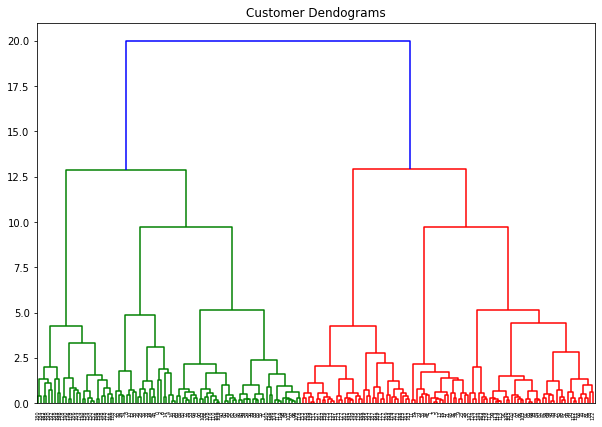

In [49]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dendogram=shc.dendrogram(shc.linkage(X_data, method='ward'))  


# Predict the clusters for the observations

In [54]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_data)

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)

In [55]:
# Now Combine the datapoints with clusters
data_cluster=pd.DataFrame(cluster.fit_predict(X_data),columns=["Cluster"])

In [56]:
Combined_data=pd.concat([customer_data,data_cluster],axis=1,join="inner")
Combined_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


# Plot the clusters

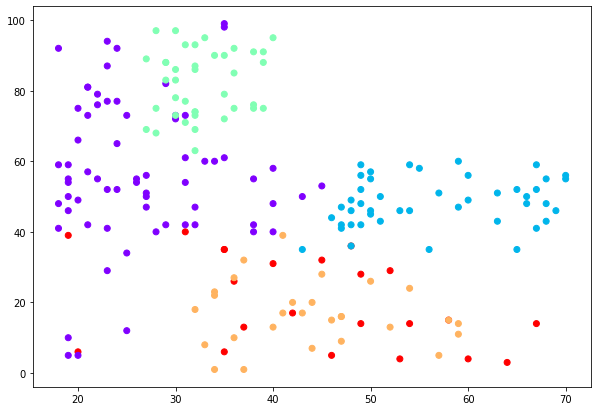

In [57]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=cluster.labels_, cmap='rainbow')  

# K-Means Clustering

# WSS Plot or Elbow Curve for Optimal cluster identification

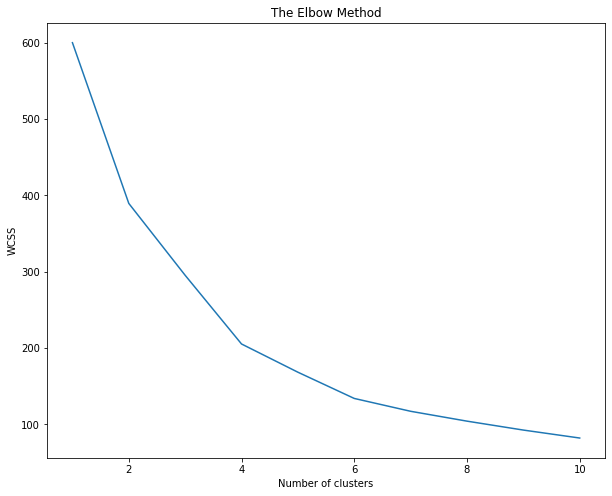

In [58]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-Means Clustering & Cluster Information

In [82]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_data)

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

#New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1
customer_data['K-MEANS CLUSTER NO'] = cluster
customer_data


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),K-MEANS CLUSTER NO
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [100]:
#Mean of clusters
kmeans_mean_cluster=round(customer_data.groupby(['K-MEANS CLUSTER NO']).agg(["count","mean"]),0)
kmeans_mean_cluster

CustomerID          Age       Annual Income (k$)        \
                        count   mean count  mean              count  mean   
K-MEANS CLUSTER NO                                                          
1                          38  161.0    38  39.0                 38  86.0   
2                          57   53.0    57  25.0                 57  40.0   
3                          40  161.0    40  33.0                 40  86.0   
4                          65   69.0    65  54.0                 65  48.0   

                   Spending Score (1-100)        
                                    count  mean  
K-MEANS CLUSTER NO                               
1                                      38  20.0  
2                                      57  60.0  
3                                      40  82.0  
4                                      65  40.0

Business Scenario: Say there are 5 marketing offers that needs to be mapped to individual customers. The business wants you to do a quick analysis to figure out which offer should be given to which customer. Potential Solution: Perform PCA and then build clusters on the Components or Build clusters on the given data after scaling. When you profile the clusters, the behaviors are likely to different across clusters. Based on the behavior, you can decide which offer should be given to which group.